In [1]:
import numpy as np
import matplotlib.pyplot as plt

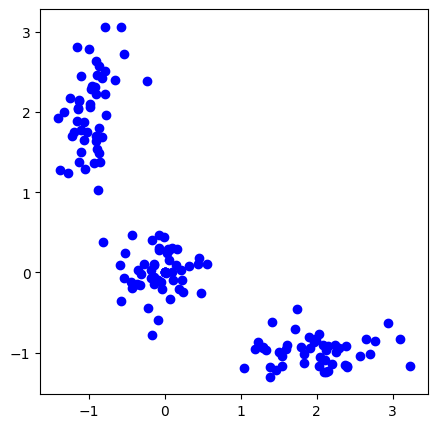

In [2]:
# Let's begin by allocation 3 cluster's points
X = np.zeros((156, 2))
np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=0.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=0.3, size=50)
X[50:100, 0] = np.random.normal(loc=2.0, scale=0.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=0.2, size=50)
X[100:150, 0] = np.random.normal(loc=-1.0, scale=0.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=0.5, size=50)
plt.figure(figsize=(5,5))
plt.plot(X[:, 0], X[:, 1], "bo");

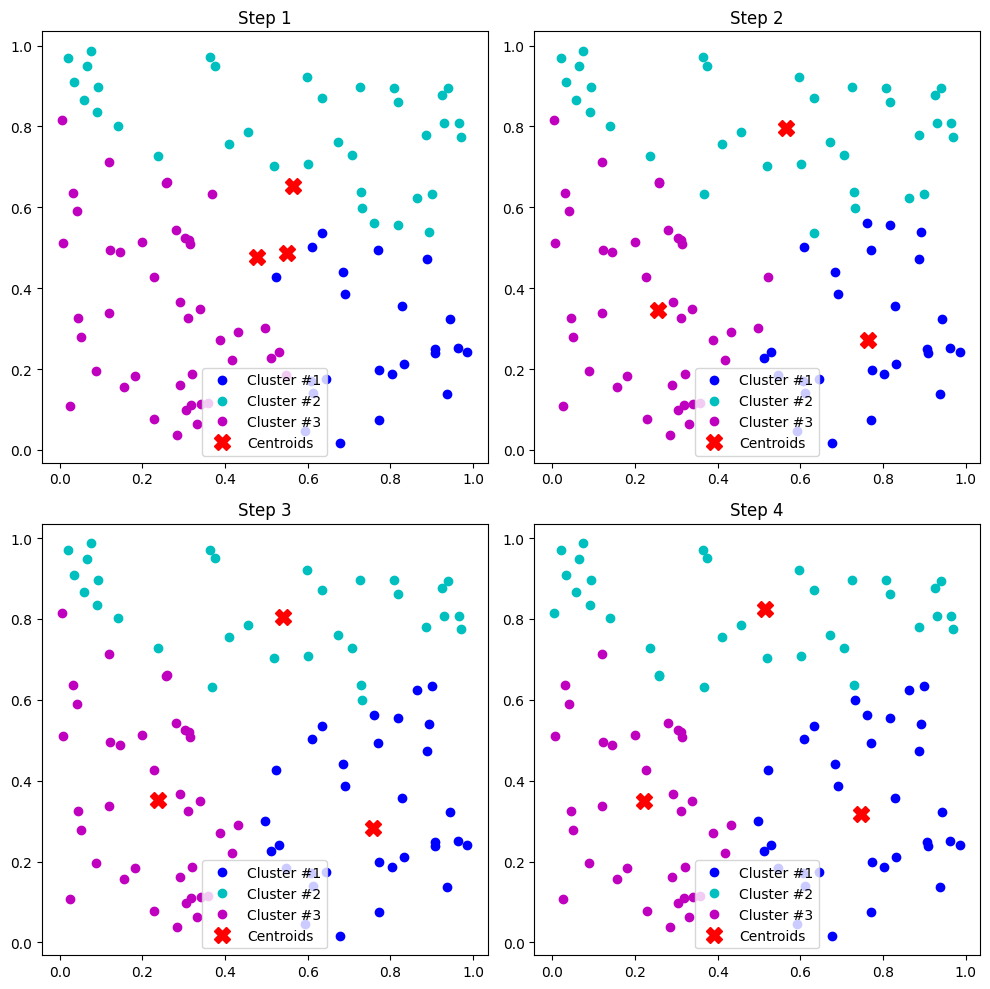

In [3]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 data points with 2 features

# Randomly initialize the 3 centroids
np.random.seed(42)
centroids = np.random.normal(loc=0.5, scale=0.1, size=6).reshape((3, 2))

# History of centroids for visualization
cent_history = [centroids.copy()]

# Perform K-means clustering for 3 iterations
for i in range(3):
    # Calculate the distance from each point to each centroid
    distances = cdist(X, centroids)
    
    # Assign each point to the closest centroid
    labels = distances.argmin(axis=1)
    
    # Update centroids based on the mean of points in each cluster
    for j in range(3):
        if np.any(labels == j):  # Avoid division by zero if a cluster has no points
            centroids[j] = np.mean(X[labels == j, :], axis=0)
    
    # Save the new centroids to history
    cent_history.append(centroids.copy())

# Plot K-means clustering process
plt.figure(figsize=(10, 10))
for i in range(4):  # Initial state + 3 iterations
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)
    
    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], "bo", label="Cluster #1")
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], "co", label="Cluster #2")
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], "mo", label="Cluster #3")
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], "rX", markersize=12, label="Centroids")
    plt.legend(loc=8)
    plt.title("Step {}".format(i + 1))

plt.tight_layout()
plt.show()


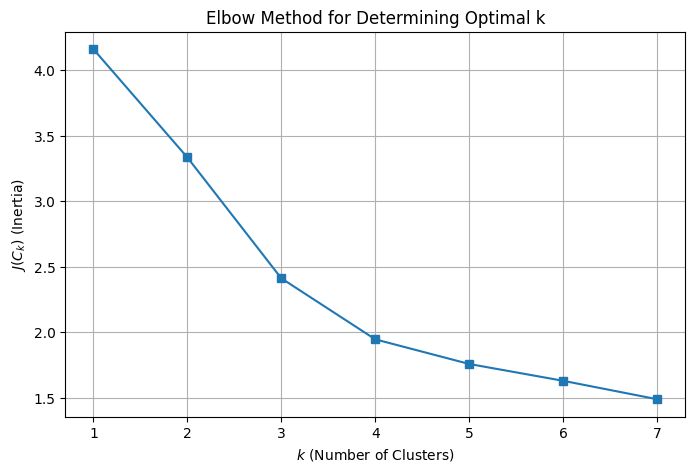

In [4]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (if not provided)
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 data points with 2 features

# List to store inertia values
inertia = []

# Calculate inertia for different numbers of clusters (k)
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init='auto').fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 8), inertia, marker="s")
plt.xlabel("$k$ (Number of Clusters)")
plt.ylabel("$J(C_k)$ (Inertia)")
plt.title("Elbow Method for Determining Optimal k")
plt.grid()
plt.show()


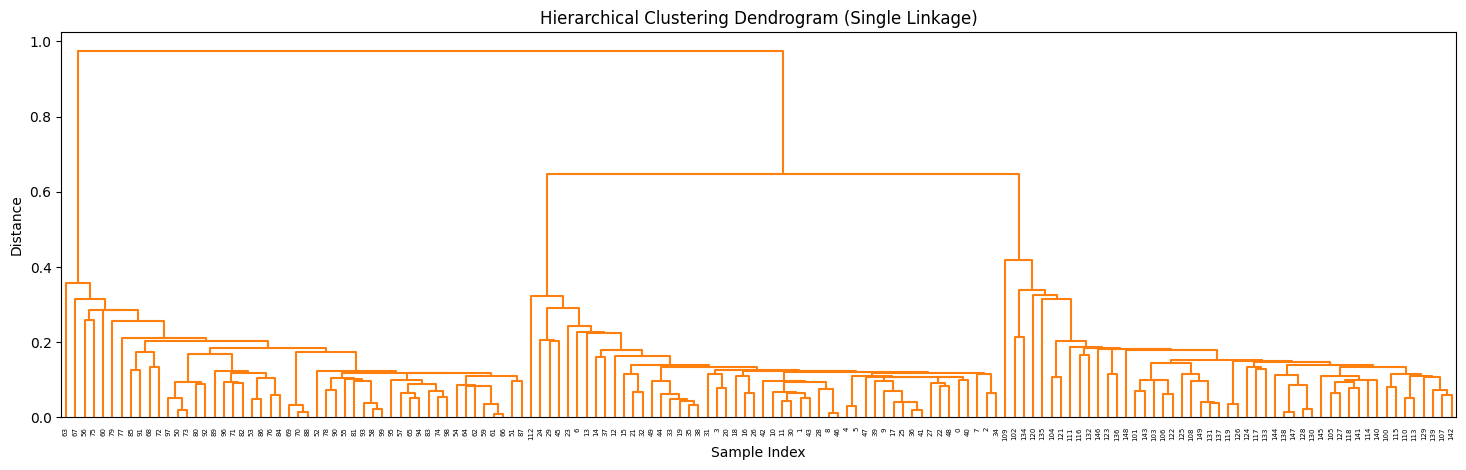

In [5]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
X = np.zeros((150, 2))
np.random.seed(seed=42)


X[:50, 0] = np.random.normal(loc=0.0, scale=0.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=0.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=0.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=0.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=0.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=0.5, size=50)


distance_mat = pdist(X)


Z = hierarchy.linkage(distance_mat, "single")

plt.figure(figsize=(18, 5))
dn = hierarchy.dendrogram(Z, color_threshold=8.5)

plt.title("Hierarchical Clustering Dendrogram (Single Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


In [6]:
import pandas as pd
from sklearn import datasets, metrics
from sklearn.cluster import (
    AffinityPropagation, 
    AgglomerativeClustering,
    KMeans, 
    SpectralClustering
)

# Load the digits dataset
data = datasets.load_digits()
X, y = data.data, data.target

# Initialize clustering algorithms
algorithms = [
    KMeans(n_clusters=10, random_state=1, n_init='auto'),
    AffinityPropagation(),
    SpectralClustering(n_clusters=10, random_state=1, affinity="nearest_neighbors"),
    AgglomerativeClustering(n_clusters=10)
]

# Evaluate each algorithm
results = []
for algo in algorithms:
    algo.fit(X)
    if hasattr(algo, 'labels_'):
        labels = algo.labels_
    else:  # For algorithms like KMeans
        labels = algo.predict(X)

    results.append({
        "ARI": metrics.adjusted_rand_score(y, labels),
        "AMI": metrics.adjusted_mutual_info_score(y, labels),
        "Homogeneity": metrics.homogeneity_score(y, labels),
        "Completeness": metrics.completeness_score(y, labels),
        "V-measure": metrics.v_measure_score(y, labels),
        "Silhouette": metrics.silhouette_score(X, labels) if len(set(labels)) > 1 else None
    })

# Create a DataFrame for results
results_df = pd.DataFrame(
    results,
    columns=["ARI", "AMI", "Homogeneity", "Completeness", "V-measure", "Silhouette"],
    index=["K-means", "Affinity", "Spectral", "Agglomerative"]
)

# Display the results
print(results_df)


                    ARI       AMI  Homogeneity  Completeness  V-measure  \
K-means        0.666618  0.741068     0.741543      0.745751   0.743641   
Affinity       0.174871  0.612364     0.958899      0.486801   0.645767   
Spectral       0.756461  0.852040     0.831691      0.876614   0.853562   
Agglomerative  0.794003  0.866832     0.857513      0.879096   0.868170   

               Silhouette  
K-means          0.176213  
Affinity         0.115161  
Spectral         0.182729  
Agglomerative    0.178497  
